# 3803ICT Big Data Analysis Assignment 

### Tyler Waugh and Long Nguyen

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style('whitegrid')

## 1) Data Preparation and Preprocessing

#### What steps were used for data preparation and preprocessing?
The data was imported using the pandas read_csv function for preprocessing and cleaning.  Most of the columns were already in an appropriate data format, with only the date of the job postings requiring conversion.
The ID column was removed as it doesn't have any meaningful purpose, being only the ID number for the job advertisement.

In [2]:
# Read in data
df = pd.read_csv('./data.csv')

# Check data types
df.dtypes

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Id                   object
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

In [3]:
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


#### Clean Data

In [4]:
# Check for missing values in columns and print results
print('Missing Values (Counts):\nTitle: ', df[df['Title'].isna()].shape[0],
      '\nCompany: ', df[df['Company'].isna()].shape[0],
      '\nDate: ', df[df['Date'].isna()].shape[0],
      '\nLocation: ', df[df['Location'].isna()].shape[0],
      '\nArea: ', df[df['Area'].isna()].shape[0],
      '\nClassification: ', df[df['Classification'].isna()].shape[0],
      '\nSubClassification: ', df[df['SubClassification'].isna()].shape[0],
      '\nRequirement: ', df[df['Requirement'].isna()].shape[0],
      '\nFullDescription: ', df[df['FullDescription'].isna()].shape[0],
      '\nLowestSalary: ', df[df['LowestSalary'].isna()].shape[0],
      '\nHighestSalary: ', df[df['HighestSalary'].isna()].shape[0],
      '\nJobType: ', df[df['JobType'].isna()].shape[0], sep='')

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)

# Show converted types
print('\n\nConverted Types:')
df.dtypes

Missing Values (Counts):
Title: 0
Company: 12004
Date: 0
Location: 121248
Area: 195819
Classification: 121248
SubClassification: 121248
Requirement: 7
FullDescription: 16175
LowestSalary: 0
HighestSalary: 0
JobType: 16098


Converted Types:


Id                           object
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
dtype: object

#### Remove Unnecessary Rows / Columns

In [5]:
# Remove Id
df = df.drop('Id',axis=1)

# Part 2 – Data Analysis and Interpretation

### 3) Study the market by sectors

##### Market Share

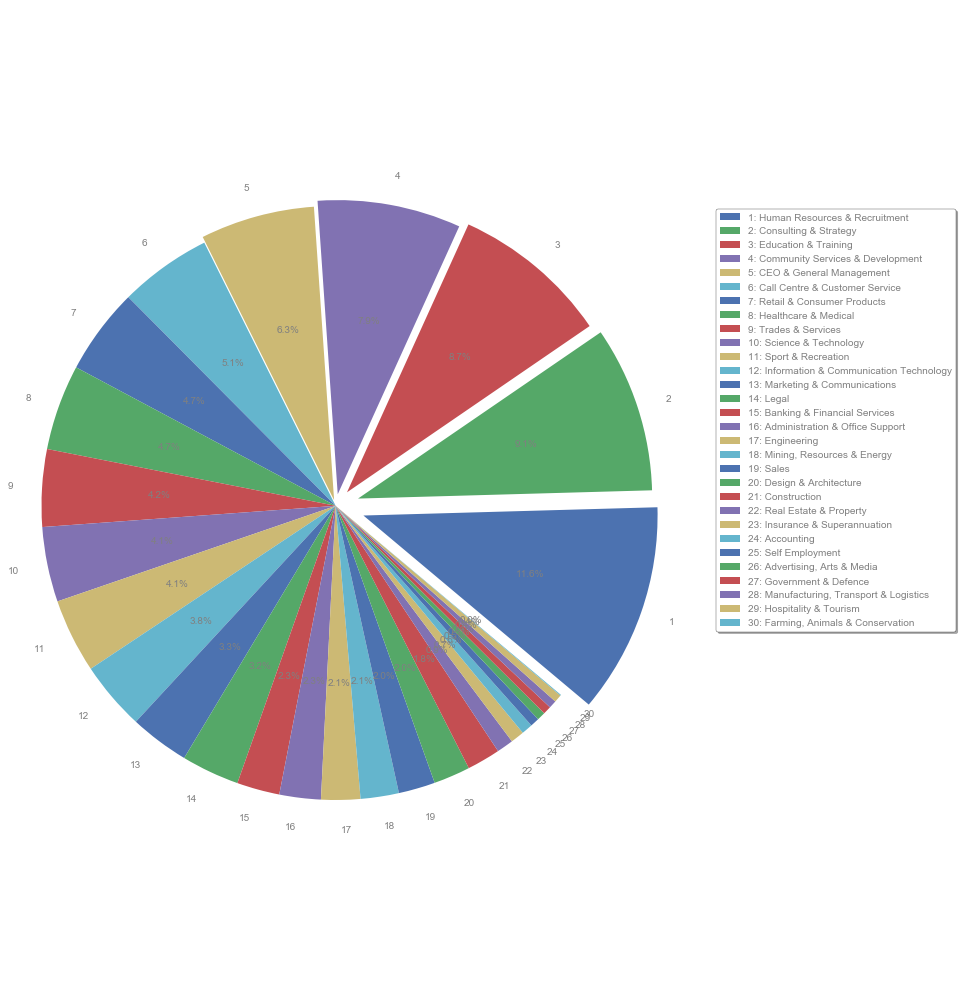

In [15]:
# Get a list of the job classifications
class_keys = df[df['Classification'].isna() == False]['Classification'].unique()

# Get proportion of market each classification has, as percentages
class_cnts = df.groupby('Classification').count()['Title'].unique()
class_proportion = sorted(class_cnts/sum(class_cnts),reverse=True)

# Get a list of the top 5
class_sorted = sorted(zip(class_keys,class_cnts),key=lambda x: x[1], reverse=True)
class_sorted = [class_sorted[x][0] for x in range(len(class_sorted))]
class_top_5 = class_sorted[:5]

# Plot pie chart of market
fig, ax = plt.subplots(figsize=(14,14))

# List of explosion proportions
explode_prop = [0 if class_sorted[x] not in class_top_5 else (0.1 - (x*0.2*0.1)) for x in range(30)]

# Manual color list
#colors = ['mintcream','lightcoral','azure','lemonchiffon','lavender','aquamarine']

# Plot pie chart
patches, texts, autotexts = ax.pie(class_proportion, explode=explode_prop, labels=[x+1 for x in range(30)], autopct='%1.1f%%', startangle=320)

# Set text color
for text in texts:
    text.set_color('grey')    
for autotext in autotexts:
    autotext.set_color('grey')

# Legend
class_numbered = [str(x+1) + ': ' + class_sorted[x] for x in range(len(class_sorted))]
legend_params = ax.legend(patches, class_numbered, loc='best', bbox_to_anchor=(1.4, 0.8), shadow=True, ncol=1, frameon=True, edgecolor='black')
for text in legend_params.get_texts():
    text.set_color('grey') 

ax.axis('equal')
plt.tight_layout()
plt.show()

##### Salary Range for each sector

In [7]:
# Get the average lowest and highest salaries within each sector
df_salaries = df.groupby('Classification').mean().reset_index()

df_lowest = df_salaries[['Classification', 'LowestSalary']]
df_highest = df_salaries[['Classification', 'HighestSalary']]

df_lowest['Salary Bounds'] = 'Lowest'
df_highest['Salary Bounds'] = 'Highest'

df_lowest.columns = ['Classification', 'AverageSalary', 'Salary Bounds']
df_highest.columns = ['Classification', 'AverageSalary', 'Salary Bounds']

df_salaries = df_highest.append(df_lowest).reset_index(drop=True)

##### What order??

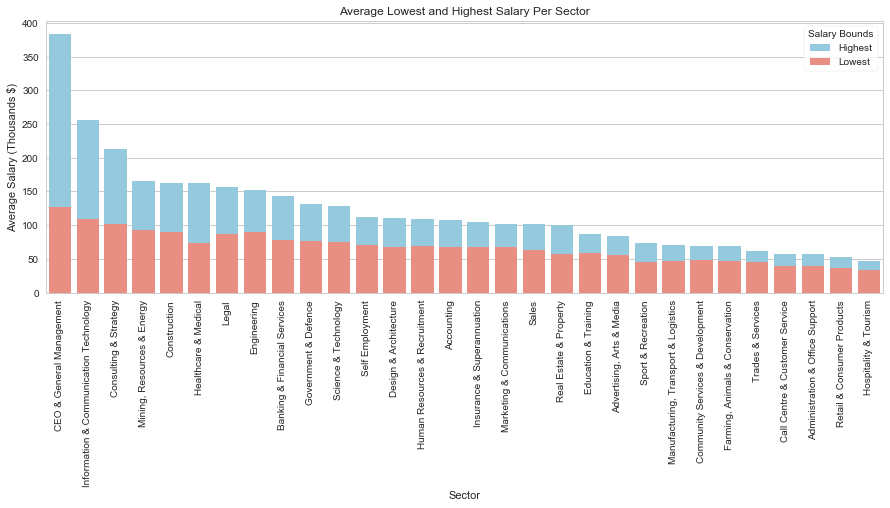

In [8]:
df_salaries.sort_values(by='AverageSalary',ascending=False,inplace=True)
plt.figure(figsize=(15,5))

plt.title('Average Lowest and Highest Salary Per Sector')
bar_plt = sns.barplot(x='Classification', y='AverageSalary', hue='Salary Bounds', palette=['skyblue','salmon'], data=df_salaries, dodge=False)
bar_plt.set_xticklabels(bar_plt.get_xticklabels(),rotation=90)
bar_plt.set_xlabel('Sector')
bar_plt.set_ylabel('Average Salary (Thousands $)')
bar_plt.legend(title='Salary Bounds',frameon=True)

plt.show()

The sector with the greatest lowest and highest average salaries can be seen in the graph above, being CEO and General Management.  This is contrasted by it's job posting volume, being the third lowest of all other sectors.  The IT sector however is ranked second highest in terms of average lowest and highest annual salary, but is ranked highest in terms of job posting volume.  It can be concluded that IT is one of the best sectors to target for someone considering entering the job market 

##### Salary Range for top 10 (In terms of job number)

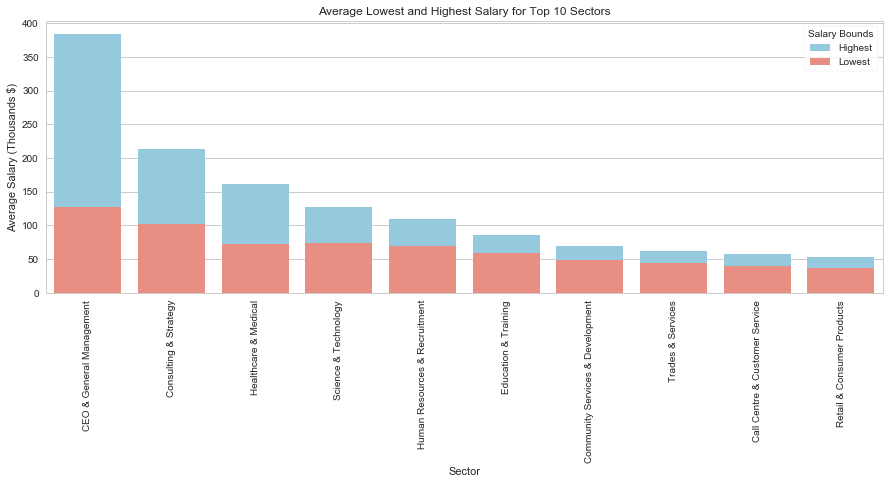

In [9]:
class_top_10 = class_sorted[:10]
df_top_10_salary = df_salaries[df_salaries['Classification'].isin(class_top_10)].sort_values(by='AverageSalary',ascending=False)
df_top_10_salary

plt.figure(figsize=(15,5))

plt.title('Average Lowest and Highest Salary for Top 10 Sectors')
bar_plt = sns.barplot(x='Classification', y='AverageSalary', hue='Salary Bounds', palette=['skyblue','salmon'], data=df_top_10_salary, dodge=False)
bar_plt.set_xticklabels(bar_plt.get_xticklabels(),rotation=90)
bar_plt.set_xlabel('Sector')
bar_plt.set_ylabel('Average Salary (Thousands $)')
bar_plt.legend(title='Salary Bounds', frameon=True)

plt.show()

##### Sub-sectors

In [10]:
subclass_keys = df[df['SubClassification'].isna() == False]['SubClassification'].unique()
subclass_keys

array(['Retail Assistants', 'Sales - Inbound',
       'Customer Service - Call Centre', 'Waiting Staff',
       'Sales - Outbound', 'Kitchen & Sandwich Hands',
       'Banking - Retail/Branch', 'Customer Service - Customer Facing',
       'Bar & Beverage Staff', 'Housekeeping', 'Other',
       'Assembly & Process Work', 'Purchasing, Procurement & Inventory',
       'Sales Representatives/Consultants', 'Chefs/Cooks',
       'Records Management & Document Control', 'Analysis & Reporting',
       'Office Management', 'Warehousing, Storage & Distribution',
       'Security Services', 'Administrative Assistants',
       'Management - Store', 'Contracts Administration', 'Road Transport',
       'Front Office & Guest Services', 'PA, EA & Secretarial',
       'Team Leaders/Supervisors', 'Cleaning Services',
       'Bookkeeping & Small Practice Accounting',
       'Commercial Sales, Leasing & Property Mgmt',
       'New Business Development', 'Management - Department/Assistant',
       'Hair & 

In [11]:
df[df['Classification'] == 'Legal'].groupby('SubClassification').count()['Title']

SubClassification
Banking & Finance Law                    190
Construction Law                         193
Corporate & Commercial Law               673
Criminal & Civil Law                      30
Environment & Planning Law                73
Family Law                               131
Generalists - In-house                   354
Generalists - Law Firm                    73
Industrial Relations & Employment Law    247
Insurance & Superannuation Law           186
Intellectual Property Law                 57
Law Clerks & Paralegals                  203
Legal Practice Management                 36
Legal Secretaries                        735
Litigation & Dispute Resolution          341
Other                                    294
Personal Injury Law                      122
Property Law                             264
Tax Law                                   35
Name: Title, dtype: int64